Team Gordon

Student Name	Student Number
 Alisha Sahota	20497348
 Anthony Ramelo	20499391
 Chris Wu	10182394
 Elizabeth Zhang	20161231
 Emily Zhao	10096273
 Sam Hossain	20466500


Loading Parachute Cross Section Data...
Data loaded successfully.


--- Exploratory Data Analysis (EDA) ---

1. Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 210 entries, 0 to 209
Data columns (total 25 columns):
 #   Column                              Non-Null Count  Dtype         
---  ------                              --------------  -----         
 0   ID                                  210 non-null    int64         
 1   Disbursement Date                   210 non-null    datetime64[ns]
 2   Loan Status                         210 non-null    object        
 3   Loan Amount                         210 non-null    float64       
 4   Outstanding Balance                 210 non-null    float64       
 5   Outstanding Principal               210 non-null    float64       
 6   Interest Rate                       210 non-null    float64       
 7   Loan Term (Months)                  210 non-null    int64         
 8   Date of Birth                       2

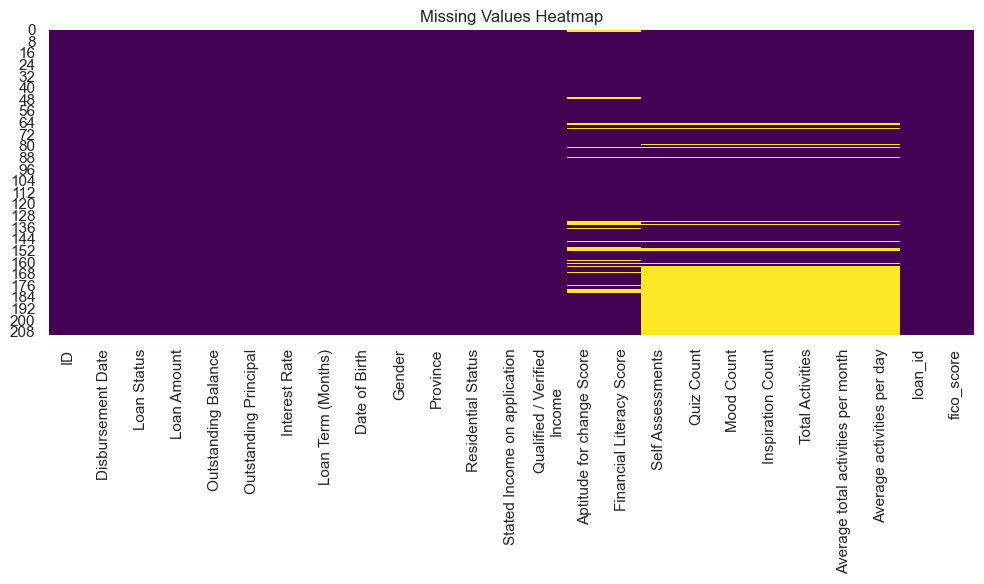

Missing values heatmap displayed.

Creating new features as per suggestions...

New features created successfully.

Deriving 'Repayment_Risk' feature...
Repayment_Risk feature created based on 'Loan Status'.

Counts of 'Repayment_Risk' in the entire dataset:
Repayment_Risk
0    172
1     38
Name: count, dtype: int64


Unique values in 'Repayment_Risk': [0 1]


Preprocessing data...
Splitting data into training and testing sets...
Data split successfully.

Numeric Columns: ['fico_score', 'Income_Difference', 'Income_Ratio', 'DTI_Ratio', 'Loan_to_Income_Ratio', 'Gender_Mapped', 'Residential_Status_Mapped', 'Remaining_Tenure']
Categorical Columns: []
Columns with all missing values: ['Gender_Mapped', 'Residential_Status_Mapped']
No categorical columns to impute.

--- Resampling Method: No Resampling ---

Training and tuning Logistic Regression with No Resampling...

Logistic Regression Performance with No Resampling:
Accuracy: 0.87
Precision: 0.80
Recall: 0.36
F1-Score: 0.50
AUC: 0.85
Tra

/opt/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [13:31:46] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/opt/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [13:31:46] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/opt/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [13:31:46] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/opt/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [13:31:46] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/opt/anaconda3/lib/python3.11/site-packa


XGBoost Performance with No Resampling:
Accuracy: 0.83
Precision: 0.00
Recall: 0.00
F1-Score: 0.00
AUC: 0.71
Training and tuning LightGBM with No Resampling...
[LightGBM] [Info] Number of positive: 21, number of negative: 96
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001499 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 216
[LightGBM] [Info] Number of data points in the train set: 117, number of used features: 6
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.179487 -> initscore=-1.519826
[LightGBM] [Info] Start training from score -1.519826
[LightGBM] [Info] Number of positive: 21, number of negative: 96
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001344 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 214
[LightGBM] [Info] Number of dat

In [ ]:
import os
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns

# Machine Learning libraries
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    roc_auc_score, roc_curve, classification_report, confusion_matrix
)
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
import lightgbm as lgb
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier

# Import resampling techniques
from imblearn.over_sampling import SMOTE, RandomOverSampler, ADASYN
from imblearn.under_sampling import RandomUnderSampler
from imblearn.combine import SMOTEENN

import warnings
warnings.filterwarnings('ignore')

# Set plot style
sns.set(style='whitegrid')

# Define output directory
OUTPUT_DIR = 'output_repayment_risk'
os.makedirs(OUTPUT_DIR, exist_ok=True)
CURRENT_YEAR = datetime.now().year

# Replace with your actual file path and sheet name
file_path = 'Input/Data 3 - October, 2024.xlsx'
tu = pd.read_excel(file_path, sheet_name='TU - Panel')
tu_df = tu.groupby('loan_id', as_index=False)['fico_score'].mean()
print("Loading Parachute Cross Section Data...")
sheet_name = 'Parachute - Cross Section'
df = pd.read_excel(file_path, sheet_name=sheet_name)
df.columns = df.columns.str.strip()

df = pd.merge(df, tu_df, left_on='ID', right_on='loan_id', how='inner')

# Ensure necessary columns exist
required_columns = [
    'ID', 'Outstanding Principal', 'Qualified / Verified\nIncome', 
    'Loan Amount', 'Outstanding Balance', 'Loan Term (Months)', 'Date of Birth', 'Disbursement Date',
    'Loan Status', 'Interest Rate', 'Gender', 'Province',
    'Residential Status', 'Stated Income on application', 'Aptitude for change Score',
    'Financial Literacy Score', 'Self Assessments', 'Quiz Count', 'Mood Count',
    'Inspiration Count', 'Total Activities', 'Average total activities per month',
    'Average activities per day', 'fico_score'
]
missing_columns = [col for col in required_columns if col not in df.columns]
if missing_columns:
    raise ValueError(f"Missing required columns: {missing_columns}")
print("Data loaded successfully.\n")

print("\n--- Exploratory Data Analysis (EDA) ---\n")

# Basic Information
print("1. Dataset Information:")
print(df.info())
print("\n")

# Summary Statistics
print("2. Summary Statistics:")
print(df.describe())
print("\n")

# Missing Values Analysis
print("3. Missing Values:")
missing_values = df.isnull().sum()
print(missing_values[missing_values > 0])
print("\n")

# Plot Missing Values
plt.figure(figsize=(10, 6))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title('Missing Values Heatmap')
plt.tight_layout()
plt.show()
print("Missing values heatmap displayed.\n")

print("Creating new features as per suggestions...\n")

# First, parse dates
df['Date of Birth'] = pd.to_datetime(df['Date of Birth'], errors='coerce')
df['Disbursement Date'] = pd.to_datetime(df['Disbursement Date'], errors='coerce')

# --- 1. Date Features ---

# Borrower Age at Disbursement
df['Borrower_Age'] = df['Disbursement Date'].dt.year - df['Date of Birth'].dt.year

# Loan Age in Days
df['Loan_Age'] = (datetime.now() - df['Disbursement Date']).dt.days

# Disbursement Month and Year
df['Disbursement_Month'] = df['Disbursement Date'].dt.month
df['Disbursement_Year'] = df['Disbursement Date'].dt.year

# Disbursement Season
df['Disbursement_Season'] = (df['Disbursement Date'].dt.month % 12) // 3 + 1

# --- 2. Loan Features ---

# Principal Paid Ratio
df['Principal_Paid_Ratio'] = 1 - (df['Outstanding Principal'] / df['Loan Amount'])

# Monthly Payment Amount
df['Loan Term (Months)'].replace(0, np.nan, inplace=True)
df['Interest Rate'].replace(0, np.nan, inplace=True)
df['Interest Rate'].fillna(0, inplace=True)
df['rate_per_month'] = df['Interest Rate'] / (12 * 100)

def calculate_monthly_payment(row):
    P = row['Loan Amount']
    r = row['rate_per_month']
    n = row['Loan Term (Months)']
    if pd.isnull(P) or pd.isnull(r) or pd.isnull(n):
        return np.nan
    if r == 0:
        if n > 0:
            return P / n
        else:
            return np.nan
    else:
        try:
            payment = (P * r) / (1 - (1 + r) ** (-n))
            return payment
        except:
            return np.nan

df['Monthly_Payment'] = df.apply(calculate_monthly_payment, axis=1)

# --- 3. Income and Financial Ratios ---

df['Qualified / Verified\nIncome'].replace(0, np.nan, inplace=True)
df['Stated Income on application'].replace(0, np.nan, inplace=True)

# Income Difference and Ratio
df['Income_Difference'] = df['Stated Income on application'] - df['Qualified / Verified\nIncome']
df['Income_Ratio'] = df['Stated Income on application'] / df['Qualified / Verified\nIncome']

# Monthly Income
df['Monthly_Income'] = df['Qualified / Verified\nIncome'] / 12

# Debt-to-Income Ratio (DTI)
df['DTI_Ratio'] = df['Monthly_Payment'] / df['Monthly_Income']

# Loan-to-Income Ratio
df['Loan_to_Income_Ratio'] = df['Loan Amount'] / df['Qualified / Verified\nIncome']

# --- 4. Demographic Features ---

# Encoding Gender
df['Gender_Mapped'] = df['Gender'].map({'Male': 1, 'Female': 0})

# Residential Status Encoding
df['Residential_Status_Mapped'] = df['Residential Status'].map({'Homeowner': 2, 'Renter': 1, 'Lives with Family': 0})

# --- 5. Engagement Metrics ---

# Total Engagement
df['Total_Engagement'] = df['Self Assessments'] + df['Quiz Count'] + df['Mood Count'] + df['Inspiration Count']

# Loan Age in months
df['Loan_Age_Months'] = df['Loan_Age'] / 30
df['Loan_Age_Months'].replace(0, np.nan, inplace=True)

# --- 6. Interaction Features ---

# Income and Credit Score
df['Income_Credit_Interaction'] = df['Qualified / Verified\nIncome'] * df['fico_score']

# Age and Loan Amount
df['Age_Loan_Interaction'] = df['Borrower_Age'] * df['Loan Amount']

# --- 7. Ratios and Derived Features ---

# Remaining Tenure in Months
df['Remaining_Tenure'] = df['Loan Term (Months)'] - df['Loan_Age_Months']

# Handle infinite and missing values
df.replace([np.inf, -np.inf], np.nan, inplace=True)

print("New features created successfully.\n")

print("Deriving 'Repayment_Risk' feature...")

# Define high-risk loan statuses based on your data
high_risk_statuses = ['Written off', 'Past due']

# Update 'Repayment_Risk' based on 'Loan Status'
def determine_repayment_risk(row):
    if row['Loan Status'] in high_risk_statuses:
        return 1  # High risk
    else:
        return 0  # Low risk

df['Repayment_Risk'] = df.apply(determine_repayment_risk, axis=1)

print("Repayment_Risk feature created based on 'Loan Status'.\n")
print("Counts of 'Repayment_Risk' in the entire dataset:")
print(df['Repayment_Risk'].value_counts())
print("\n")

print("Unique values in 'Repayment_Risk':", df['Repayment_Risk'].unique())
print("\n")

print("Preprocessing data...")

columns_to_remove = [
    'ID', 'Date of Birth', 'Disbursement Date', 'Loan Status',
    'Loan Amount', 'Outstanding Balance', 'Outstanding Principal',
    'Loan Term (Months)', 'Stated Income on application', 'Qualified / Verified\nIncome',
    'Residential Status', 'Gender', 'Interest Rate',
    'Self Assessments', 'Quiz Count', 'Mood Count', 'Inspiration Count',
    'Total Activities', 'Average total activities per month', 'Average activities per day',
    'Loan_Age', 'Loan_Age_Months', 'rate_per_month', 'loan_id', 'Province',
    'Principal_Paid_Ratio', 'Engagement_Rate', 'Province', 'Monthly_Income', 'Is_Homeowner',
    'Aptitude for change Score', 'Age_Loan_Interaction', 'Financial Literacy Score',
    'Total_Engagement', 'Monthly_Payment', 'Income_Credit_Interaction'
]
df_encoded = df.copy()
df_encoded.drop(columns=[col for col in columns_to_remove if col in df_encoded.columns], inplace=True)

# Handle infinite values
df_encoded.replace([np.inf, -np.inf], np.nan, inplace=True)

# Separate features and target
X = df_encoded.drop('Repayment_Risk', axis=1)
y = df_encoded['Repayment_Risk']

# Split the data
print("Splitting data into training and testing sets...")
X_train_raw, X_test_raw, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)
print("Data split successfully.\n")

# ----------------------------
# Handle Missing Values Before Resampling
# ----------------------------

# Identify numerical and categorical columns
numeric_cols = X.select_dtypes(include=['float64', 'int64']).columns.tolist()
categorical_cols = X.select_dtypes(include=['object', 'category']).columns.tolist()

# Remove any misclassified columns
numeric_cols = [col for col in numeric_cols if col not in categorical_cols]

# Print columns for debugging
print("Numeric Columns:", numeric_cols)
print("Categorical Columns:", categorical_cols)

# Identify columns with all missing values in X_train_raw
all_missing_cols = X_train_raw[numeric_cols].columns[X_train_raw[numeric_cols].isnull().all()]
print("Columns with all missing values:", list(all_missing_cols))

# Remove columns with all missing values from numeric_cols
numeric_cols = [col for col in numeric_cols if col not in all_missing_cols]

# Impute missing values in numerical features
num_imputer = SimpleImputer(strategy='median')
X_train_num = num_imputer.fit_transform(X_train_raw[numeric_cols])
X_test_num = num_imputer.transform(X_test_raw[numeric_cols])

# Initialize DataFrames for imputed data
X_train = pd.DataFrame(X_train_num, columns=numeric_cols)
X_test = pd.DataFrame(X_test_num, columns=numeric_cols)

# Check if there are any categorical columns
if categorical_cols:
    # Impute missing values in categorical features
    cat_imputer = SimpleImputer(strategy='most_frequent')
    X_train_cat = cat_imputer.fit_transform(X_train_raw[categorical_cols])
    X_test_cat = cat_imputer.transform(X_test_raw[categorical_cols])

    # Convert to DataFrame
    X_train_cat = pd.DataFrame(X_train_cat, columns=categorical_cols)
    X_test_cat = pd.DataFrame(X_test_cat, columns=categorical_cols)

    # Concatenate numerical and categorical features
    X_train = pd.concat([X_train, X_train_cat], axis=1)
    X_test = pd.concat([X_test, X_test_cat], axis=1)
else:
    print("No categorical columns to impute.")


# Now, X_train and X_test have no missing values and are ready for resampling and preprocessing

# ----------------------------
# Define Resampling Methods
# ----------------------------

resampling_methods = {
    'No Resampling': None,
    'Random Under-Sampling': RandomUnderSampler(random_state=42),
    'Random Over-Sampling': RandomOverSampler(random_state=42),
    'SMOTE': SMOTE(random_state=42),
    'ADASYN': ADASYN(random_state=42),
    'SMOTEENN': SMOTEENN(random_state=42)
}

# ----------------------------
# Preprocess the data
# ----------------------------

# Define preprocessing pipelines
numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())
])

if categorical_cols:
    categorical_transformer = Pipeline(steps=[
        ('onehot', OneHotEncoder(handle_unknown='ignore', sparse_output=False))
    ])

    preprocessor = ColumnTransformer(
        transformers=[
            ('num', numeric_transformer, numeric_cols),
            ('cat', categorical_transformer, categorical_cols)
        ]
    )
else:
    preprocessor = ColumnTransformer(
        transformers=[
            ('num', numeric_transformer, numeric_cols)
        ]
    )

# ----------------------------
# 4. Initialize and Train Classification Models with Hyperparameter Tuning
# ----------------------------

def tune_model(model, param_grid, X_train, y_train):
    grid_search = GridSearchCV(
        estimator=model,
        param_grid=param_grid,
        scoring='roc_auc',
        cv=5,
        n_jobs=-1
    )
    grid_search.fit(X_train, y_train)
    return grid_search.best_estimator_

classification_models = {
    'Logistic Regression': {
        'model': LogisticRegression(random_state=42, max_iter=1000),
        'params': {
            'C': [0.01, 0.1, 1, 10],
            'penalty': ['l2'],
            'solver': ['lbfgs']
        }
    },
    'Decision Tree': {
        'model': DecisionTreeClassifier(random_state=42),
        'params': {
            'max_depth': [None, 5, 10],
            'min_samples_split': [2, 5, 10]
        }
    },
    'Random Forest': {
        'model': RandomForestClassifier(random_state=42),
        'params': {
            'n_estimators': [100, 200],
            'max_depth': [None, 5, 10],
            'min_samples_split': [2, 5, 10]
        }
    },
    'XGBoost': {
        'model': xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42),
        'params': {
            'n_estimators': [100, 200],
            'max_depth': [3, 5, 7],
            'learning_rate': [0.01, 0.1, 0.2]
        }
    },
    'LightGBM': {
        'model': lgb.LGBMClassifier(random_state=42),
        'params': {
            'n_estimators': [100, 200],
            'max_depth': [-1, 5, 10],
            'learning_rate': [0.01, 0.1, 0.2]
        }
    },
    'SVC': {
        'model': SVC(probability=True, random_state=42),
        'params': {
            'C': [0.1, 1, 10],
            'kernel': ['linear', 'rbf']
        }
    },
    'KNN': {
        'model': KNeighborsClassifier(),
        'params': {
            'n_neighbors': [3, 5, 7],
            'weights': ['uniform', 'distance']
        }
    },
    'Neural Network': {
        'model': MLPClassifier(random_state=42, max_iter=500),
        'params': {
            'hidden_layer_sizes': [(50,), (100,), (100, 50)],
            'activation': ['tanh', 'relu'],
            'alpha': [0.0001, 0.001]
        }
    }
}

classification_performance = []

for resample_name, resampler in resampling_methods.items():
    print(f"\n--- Resampling Method: {resample_name} ---\n")
    
    # Apply resampling method if not None
    if resampler is not None:
        X_train_resampled, y_train_resampled = resampler.fit_resample(X_train, y_train)
    else:
        X_train_resampled, y_train_resampled = X_train, y_train
    
    # Preprocess the data
    # Fit the preprocessor on the resampled training data
    X_train_processed = preprocessor.fit_transform(X_train_resampled)
    X_test_processed = preprocessor.transform(X_test)
    
    for model_name, model_info in classification_models.items():
        model = model_info['model']
        param_grid = model_info['params']
        
        print(f"Training and tuning {model_name} with {resample_name}...")
        best_model = tune_model(model, param_grid, X_train_processed, y_train_resampled)
        
        # Predict on test data
        y_pred = best_model.predict(X_test_processed)
        
        # Predict probabilities for AUC
        if hasattr(best_model, "predict_proba"):
            y_prob = best_model.predict_proba(X_test_processed)[:, 1]
        else:
            y_prob = best_model.decision_function(X_test_processed)
            y_prob = (y_prob - y_prob.min()) / (y_prob.max() - y_prob.min())
        
        # Calculate metrics
        acc = accuracy_score(y_test, y_pred)
        prec = precision_score(y_test, y_pred, zero_division=0)
        rec = recall_score(y_test, y_pred, zero_division=0)
        f1 = f1_score(y_test, y_pred, zero_division=0)
        auc = roc_auc_score(y_test, y_prob)
        
        # Store metrics
        classification_performance.append({
            'Resampling': resample_name,
            'Model': model_name,
            'Accuracy': round(acc, 2),
            'Precision': round(prec, 2),
            'Recall': round(rec, 2),
            'F1-Score': round(f1, 2),
            'AUC': round(auc, 2)
        })
        
        # Print metrics
        print(f"\n{model_name} Performance with {resample_name}:")
        print(f"Accuracy: {acc:.2f}")
        print(f"Precision: {prec:.2f}")
        print(f"Recall: {rec:.2f}")
        print(f"F1-Score: {f1:.2f}")
        print(f"AUC: {auc:.2f}")
        
        # Optional: Plot confusion matrix, ROC curve, etc.
        # ... (Include your plotting code here if desired)

# ----------------------------
# 5. Compare Classification Model Performance
# ----------------------------

# Create a DataFrame from the results
performance_df = pd.DataFrame(classification_performance)

# Display the top models sorted by AUC
print("\nClassification Model Performance Comparison:")
print(performance_df.sort_values(by='AUC', ascending=False))

# Visualize the performance
plt.figure(figsize=(12, 6))
sns.barplot(data=performance_df, x='Model', y='AUC', hue='Resampling')
plt.xticks(rotation=45, ha='right')
plt.title('AUC Comparison by Model and Resampling Method')
plt.ylabel('AUC')
plt.xlabel('Model')
plt.legend(title='Resampling Method', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

# ----------------------------
# 6. Saving the Best Model
# ----------------------------

import joblib

# Define the best model details
best_model_resampling = best_composite_row['Resampling']
best_model_name = best_composite_row['Model']

# Retrieve the corresponding resampler
best_resampler = resampling_methods.get(best_model_resampling, None)

# Preprocess the data with the selected resampling method
if best_resampler is not None:
    X_train_final, y_train_final = best_resampler.fit_resample(X_train, y_train)
else:
    X_train_final, y_train_final = X_train, y_train

# Fit the preprocessor on the final training data
X_train_final_processed = preprocessor.fit_transform(X_train_final)
X_test_processed_final = preprocessor.transform(X_test)

# Retrieve the model's hyperparameters
# Note: To capture the best hyperparameters, modify the loop to store them if not already done

# For demonstration, retrain the best model with the entire training data
# Initialize the model with default parameters or best-found parameters
if best_model_name == 'Logistic Regression':
    model = LogisticRegression(random_state=42, max_iter=1000)
elif best_model_name == 'Decision Tree':
    model = DecisionTreeClassifier(random_state=42)
elif best_model_name == 'Random Forest':
    model = RandomForestClassifier(random_state=42)
elif best_model_name == 'XGBoost':
    model = xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
elif best_model_name == 'LightGBM':
    model = lgb.LGBMClassifier(random_state=42)
elif best_model_name == 'SVC':
    model = SVC(probability=True, random_state=42)
elif best_model_name == 'KNN':
    model = KNeighborsClassifier()
elif best_model_name == 'Neural Network':
    model = MLPClassifier(random_state=42, max_iter=500)
else:
    raise ValueError("Unsupported model selected.")

# Optionally, you can set the best hyperparameters if you have them
# Example:
# if best_model_name == 'Neural Network':
#     model = MLPClassifier(hidden_layer_sizes=(100,), activation='relu', alpha=0.001, random_state=42, max_iter=500)

# Fit the model on the entire training data
model.fit(X_train_final_processed, y_train_final)

# Save the trained model
model_filename = f"best_model_{best_model_name}_{best_model_resampling}.joblib"
joblib.dump(model, os.path.join(OUTPUT_DIR, model_filename))
print(f"\nBest model '{best_model_name}' with resampling '{best_model_resampling}' saved as '{model_filename}' in '{OUTPUT_DIR}'.")

# Save the preprocessor for future use
preprocessor_filename = "preprocessor.joblib"
joblib.dump(preprocessor, os.path.join(OUTPUT_DIR, preprocessor_filename))
print(f"Preprocessor saved as '{preprocessor_filename}' in '{OUTPUT_DIR}'.")